# Ajuste de Datos en Python

## Introducción a `numpy.linalg.lstsq`

Mientras que resolver las ecuaciones normales proporciona una solución explícita al problema de mínimos cuadrados, implica calcular la inversa de \( \mathbf{X}^\top \mathbf{X} \), lo cual puede ser computacionalmente intensivo y numéricamente inestable, especialmente al tratar con matrices grandes o mal condicionadas.

`numpy.linalg.lstsq` proporciona una alternativa más eficiente y estable utilizando métodos como la Descomposición en Valores Singulares (SVD) internamente.

**Ventajas**:

- **Estabilidad Numérica**: Evita la inversión directa de matrices, reduciendo errores numéricos.
- **Eficiencia**: Optimizado para rendimiento con conjuntos de datos grandes.
- **Salidas Adicionales**: Proporciona residuos, rango y valores singulares.

## Sintaxis y Parámetros

La sintasis de la función:

```python
numpy.linalg.lstsq(a, b, rcond=None)
```

- `a`: Matriz de coeficientes \( \mathbf{X} \).
- `b`: Valores de la variable dependiente \( \mathbf{y} \).
- `rcond`: Relación de corte para valores singulares pequeños (el valor predeterminado es `-1` en versiones recientes de NumPy).

**Regresa**:

- `x`: Solución de mínimos cuadrados \( \beta \).
- `residuals`: Suma de los cuadrados de los residuos.
- `rank`: Rango de la matriz `a`.
- `s`: Valores singulares de `a`.

## Implementación Práctica


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 3 * x + 7 + np.random.normal(0, 5, size=x.shape)

# Matriz de diseño
X = np.column_stack((x, np.ones_like(x)))

# Usando numpy.linalg.lstsq
beta_lstsq, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

print(f"Pendiente: {beta_lstsq[0]}")
print(f"Intercepto: {beta_lstsq[1]}")
print(f"Residuos: {residuals}")
print(f"Rango de X: {rank}")
print(f"Valores singulares de X: {s}")

Pendiente: 2.294188753504908
Intercepto: 11.231852594040955
Residuos: [1367.45940366]
Rango de X: 2
Valores singulares de X: [41.48583558  3.54949515]


### Graficar la Línea Ajustada


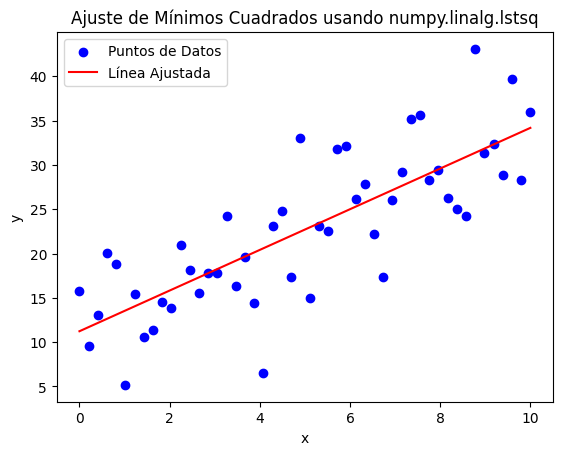

In [5]:
# Valores predichos
y_pred = X @ beta_lstsq

# Graficar
plt.scatter(x, y, color='blue', label='Puntos de Datos')
plt.plot(x, y_pred, color='red', label='Línea Ajustada')
plt.title('Ajuste de Mínimos Cuadrados usando numpy.linalg.lstsq')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Comparación con Ecuaciones Normales

### Estabilidad Numérica

- **Ecuaciones Normales**: Implica invertir \( \mathbf{X}^\top \mathbf{X} \), lo que puede estar mal condicionado si \( \mathbf{X} \) no tiene rango completo o hay multicolinealidad.
- **`numpy.linalg.lstsq`**: Utiliza SVD o descomposición QR, proporcionando resultados más confiables.

### Rendimiento

- Para conjuntos de datos grandes, `numpy.linalg.lstsq` es más eficiente debido a algoritmos optimizados.

### Ejemplo con Matriz Mal Condicionada

Crear una matriz de diseño con columnas casi colineales:

In [6]:
# Datos casi colineales
x1 = np.linspace(0, 10, 50)
x2 = x1 + np.random.normal(0, 0.01, size=x1.shape)  # x2 es casi un múltiplo de x1

X_colinear = np.column_stack((x1, x2, np.ones_like(x1)))

# Variable objetivo
y = 2 * x1 + 3 * x2 + 4 + np.random.normal(0, 1, size=x1.shape)

# Solución con ecuaciones normales
try:
    beta_ne = np.linalg.inv(X_colinear.T @ X_colinear) @ X_colinear.T @ y
    print("Solución con Ecuaciones Normales:", beta_ne)
except np.linalg.LinAlgError as e:
    print("Las ecuaciones normales fallaron debido a:", e)

# Solución con lstsq
beta_lstsq, residuals, rank, s = np.linalg.lstsq(X_colinear, y, rcond=None)
print("Solución con lstsq:", beta_lstsq)

Solución con Ecuaciones Normales: [ 16.55160415 -11.58185212   4.40472076]
Solución con lstsq: [ 16.55160415 -11.58185211   4.40472076]


**Observación**:

- Las ecuaciones normales pueden fallar o producir resultados inexactos.
- `numpy.linalg.lstsq` maneja la matriz casi singular de manera efectiva.

## Características Adicionales

### Mínimos Cuadrados Ponderados

Si tenemos pesos para cada observación, podemos modificar las ecuaciones:

In [7]:
# Pesos
pesos = np.random.uniform(0.5, 1.5, size=y.shape)

# Matriz de diseño y objetivo ponderados
W = np.diag(np.sqrt(pesos))
X_ponderado = W @ X
y_ponderado = W @ y

# Resolver mínimos cuadrados ponderados
beta_ponderado, residuals, rank, s = np.linalg.lstsq(X_ponderado, y_ponderado, rcond=None)

beta_ponderado

array([4.97268391, 4.38112722])

**Observación**:

- Las ecuaciones normales pueden fallar o producir resultados inexactos.
- `numpy.linalg.lstsq` maneja la matriz casi singular de manera efectiva.

## Características Adicionales

### Mínimos Cuadrados Ponderados

Si tenemos pesos para cada observación, podemos modificar las ecuaciones:

In [8]:
# Pesos
pesos = np.random.uniform(0.5, 1.5, size=y.shape)

# Matriz de diseño y objetivo ponderados
W = np.diag(np.sqrt(pesos))
X_ponderado = W @ X
y_ponderado = W @ y

# Resolver mínimos cuadrados ponderados
beta_ponderado, residuals, rank, s = np.linalg.lstsq(X_ponderado, y_ponderado, rcond=None)

beta_ponderado

array([4.96616592, 4.44127383])

# Ajuste Polinomial

**Objetivo**: Extender el ajuste de mínimos cuadrados a modelos polinomiales y entender las implicaciones de la complejidad del modelo.

## Comprendiendo la Regresión Polinomial

La regresión polinomial modela la relación entre la variable independiente $ x $ y la variable dependiente $ y $ como un polinomio de grado $ n $:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon
$$

**Propósito**:

- Capturar relaciones no lineales.
- Proporcionar un ajuste flexible a los datos.


## Construcción de la Matriz de Diseño

Para un polinomio de grado $ n $, la matriz de diseño $ \mathbf{X} $ incluye potencias de $ x $:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \dots & x_m^n \\
\end{bmatrix}
$$

## Implementación del Ajuste Polinomial con NumPy

### Usando `numpy.polyfit`

`numpy.polyfit` ajusta un polinomio de un grado especificado a los datos.


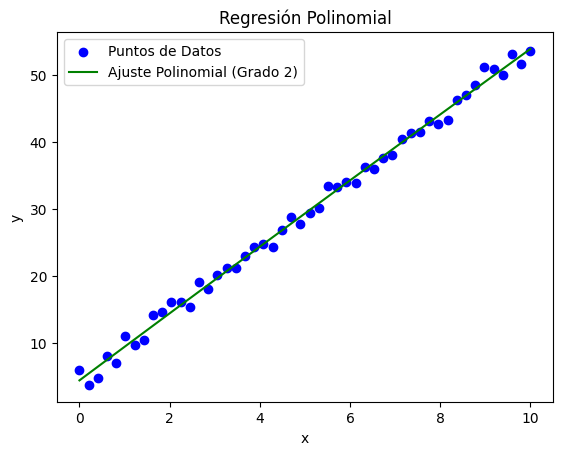

In [9]:
# Ajuste polinomial de grado 2
grado = 2
coeficientes = np.polyfit(x, y, deg=grado)

# Crear función polinomial
polinomio = np.poly1d(coeficientes)

# Valores predichos
y_poli_fit = polinomio(x)

# Graficar
plt.scatter(x, y, color='blue', label='Puntos de Datos')
plt.plot(x, y_poli_fit, color='green', label=f'Ajuste Polinomial (Grado {grado})')
plt.title('Regresión Polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Construcción y Resolución Manual

Alternativamente, construir la matriz de diseño manualmente:

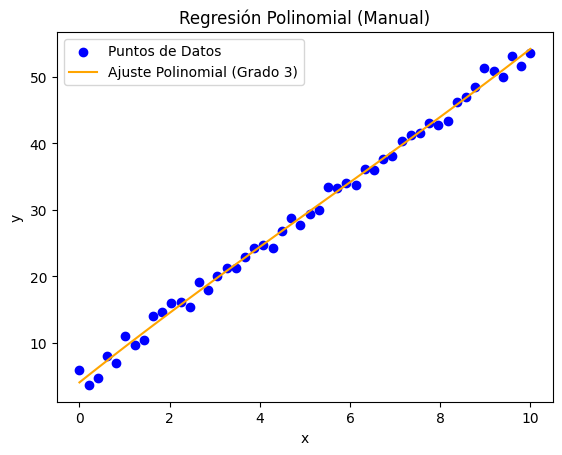

In [10]:
# Grado del polinomio
grado = 3

# Construcción de la matriz de diseño
X_poli = np.column_stack([x**i for i in range(grado + 1)])

# Resolver usando lstsq
beta_poli, residuals, rank, s = np.linalg.lstsq(X_poli, y, rcond=None)

# Valores predichos
y_poli_pred = X_poli @ beta_poli

# Graficar
plt.scatter(x, y, color='blue', label='Puntos de Datos')
plt.plot(x, y_poli_pred, color='orange', label=f'Ajuste Polinomial (Grado {grado})')
plt.title('Regresión Polinomial (Manual)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Elección del Grado del Polinomio

- **Subajuste**: Un grado demasiado bajo puede no capturar la tendencia subyacente.
- **Sobreajuste**: Un grado demasiado alto puede ajustar el ruido en lugar de la señal.

### Compensación Sesgo-Varianza

- **Sesgo**: Error introducido al aproximar un problema del mundo real mediante un modelo simplificado.
- **Varianza**: Error introducido por sensibilidad a fluctuaciones en el conjunto de entrenamiento.

## Técnicas de Selección de Modelos

### Validación Cruzada

Dividir los datos en conjuntos de entrenamiento y validación para evaluar el rendimiento del modelo en datos no vistos.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir datos
x_entreno, x_val, y_entreno, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustar modelo en datos de entrenamiento
coeficientes = np.polyfit(x_entreno, y_entreno, deg=grado)
polinomio = np.poly1d(coeficientes)

# Evaluar en datos de validación
y_val_pred = polinomio(x_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f"MSE de Validación: {mse}")

MSE de Validación: 1.0587840353242217


### Criterios de Información

- **Criterio de Información de Akaike (AIC)**
- **Criterio de Información Bayesiano (BIC)**

Estos criterios penalizan la complejidad del modelo.

## Técnicas de Regularización

Introducir regularización para prevenir el sobreajuste:

- **Regresión Ridge**: Penaliza la suma de los cuadrados de los coeficientes.
- **Regresión Lasso**: Penaliza la suma de los valores absolutos de los coeficientes.


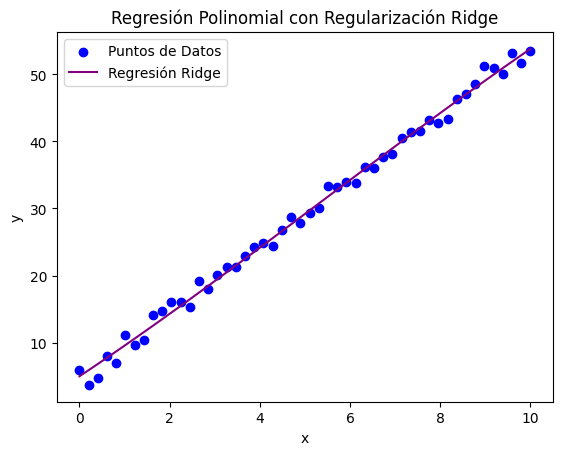

In [12]:
from sklearn.linear_model import Ridge, Lasso

# Reestructurar x para sklearn
x_reshaped = x.reshape(-1, 1)

# Características polinomiales
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=grado)
X_poli = poly_features.fit_transform(x_reshaped)

# Regresión Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_poli, y)

# Predicciones
y_ridge_pred = ridge.predict(X_poli)

# Graficar
plt.scatter(x, y, color='blue', label='Puntos de Datos')
plt.plot(x, y_ridge_pred, color='purple', label='Regresión Ridge')
plt.title('Regresión Polinomial con Regularización Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Elementos Interactivos

- **Widgets**:

  - Ajustar el grado del polinomio usando un deslizador.
  - Visualizar cómo cambia el ajuste.
  - Mostrar errores de entrenamiento y validación.

In [13]:
from ipywidgets import interact

def plot_poly_fit(grado):
    coeficientes = np.polyfit(x, y, deg=grado)
    polinomio = np.poly1d(coeficientes)
    y_poli_fit = polinomio(x)
    plt.scatter(x, y, color='blue', label='Puntos de Datos')
    plt.plot(x, y_poli_fit, label=f'Grado {grado}')
    plt.title('Regresión Polinomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interact(plot_poly_fit, grado=(1, 10));

interactive(children=(IntSlider(value=5, description='grado', max=10, min=1), Output()), _dom_classes=('widget…

# Análisis de Residuos

**Objetivo**: Analizar los residuos para evaluar la calidad del ajuste e identificar patrones o sesgos en el modelo.

## Comprendiendo los Residuos

- **Residuos**: Las diferencias entre los valores observados y los valores predichos por el modelo.

$$
r_i = y_i - \hat{y}_i
$$

- **Propósito**: Evaluar si el modelo captura adecuadamente los patrones de los datos.

## Tipos de Residuos

- **Residuos Crudos**: Diferencias directas $ r_i $.
- **Residuos Estandarizados**: Residuos divididos por una estimación de su desviación estándar.
- **Residuos Studentizados**: Similar a los residuos estandarizados pero proporcionan una mejor estimación, especialmente para muestras pequeñas.

## Graficando Residuos

### Residuos vs. Valores Ajustados

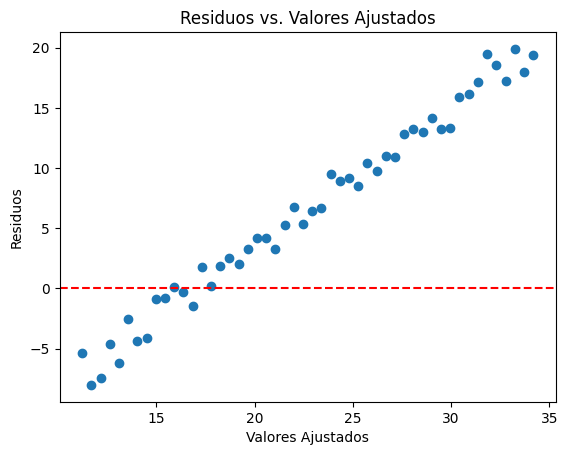

In [14]:
# Residuos
residuos = y - y_pred

# Graficar
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

**Interpretación**:

- **Dispersión Aleatoria**: Sugiere un buen ajuste.
- **Patrones**: Indican inadecuación del modelo (por ejemplo, no linealidad, heterocedasticidad).

### Residuos vs. Variable Independiente

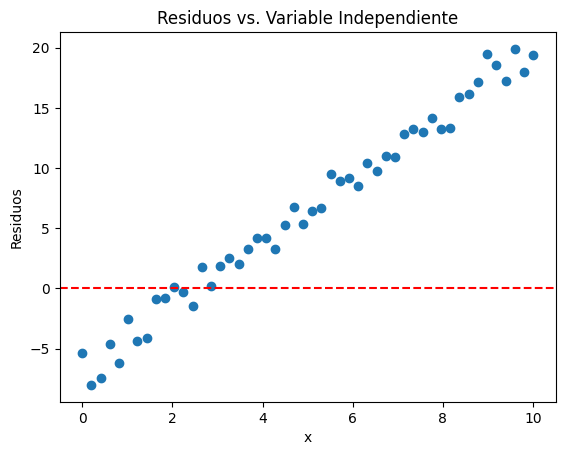

In [16]:
plt.scatter(x, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Variable Independiente')
plt.xlabel('x')
plt.ylabel('Residuos')
plt.show()

## Diagnosticando Problemas del Modelo

### No Linealidad

- **Patrón**: Los residuos muestran un patrón curvo.
- **Solución**: Considerar un modelo diferente (por ejemplo, regresión polinomial).

### Heterocedasticidad

- **Patrón**: La varianza de los residuos aumenta o disminuye con los valores ajustados.
- **Solución**: Transformar variables, usar mínimos cuadrados ponderados.

### Autocorrelación

- **Patrón**: Los residuos están correlacionados entre sí.
- **Solución**: Usar modelos de series de tiempo (por ejemplo, ARIMA).

## Medidas Cuantitativas

### Error Cuadrático Medio (MSE)

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} r_i^2
$$

### R-cuadrado $( R^2 )$

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} r_i^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

- Mide la proporción de varianza explicada por el modelo.

---

## Ejemplo: Análisis de Residuos con Ajuste Polinomial

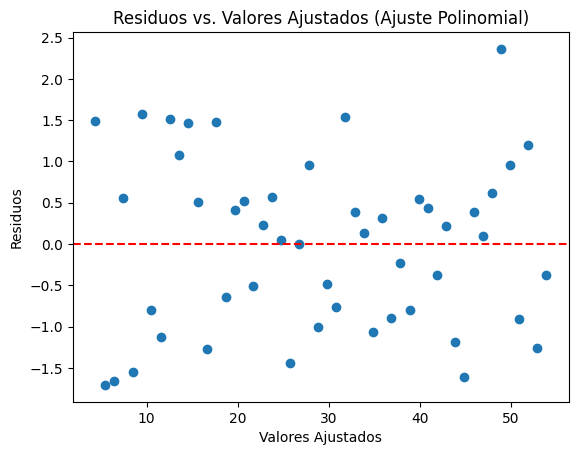

In [17]:
# Usando el ajuste polinomial anterior
residuos_poli = y - y_poli_fit

# Residuos vs. Valores Ajustados
plt.scatter(y_poli_fit, residuos_poli)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados (Ajuste Polinomial)')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

**Observación**:

- Verificar aleatoriedad.
- Si existen patrones, reconsiderar el modelo.

## Normalidad de los Residuos

### Histograma

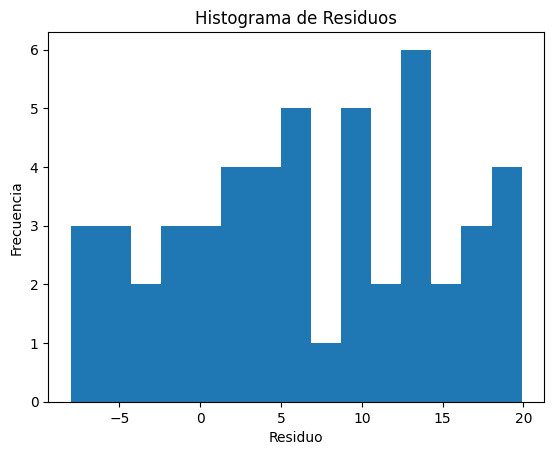

In [18]:
plt.hist(residuos, bins=15)
plt.title('Histograma de Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

### Gráfico Q-Q

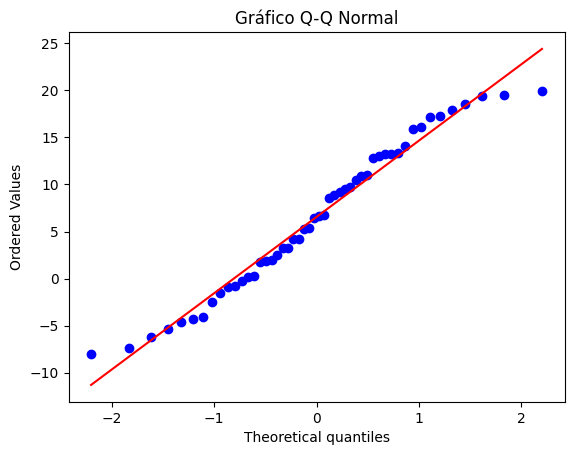

In [19]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q Normal')
plt.show()

**Interpretación**:

- Desviaciones de la línea indican no normalidad.
- Residuos no normales pueden afectar pruebas de hipótesis e intervalos de confianza.

## Observaciones Influyentes

- **Puntos de Apalancamiento**: Observaciones con valores predictivos extremos.
- **Distancia de Cook**: Mide la influencia de cada observación en los valores ajustados.

In [20]:
import statsmodels.api as sm

# Ajustar modelo usando statsmodels para diagnósticos
X_con_constante = sm.add_constant(X)
modelo = sm.OLS(y, X_con_constante).fit()

# Medidas de influencia
influence = modelo.get_influence()
cooks_d = influence.cooks_distance[0]

# Graficar Distancia de Cook
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Distancia de Cook")
plt.xlabel('Observación')
plt.ylabel("Distancia de Cook")
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

import statsmodels.api as sm

# Ajustar modelo usando statsmodels para diagnósticos
X_con_constante = sm.add_constant(X)
modelo = sm.OLS(y, X_con_constante).fit()

# Medidas de influencia
influence = modelo.get_influence()
cooks_d = influence.cooks_distance[0]

# Graficar Distancia de Cook
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Distancia de Cook")
plt.xlabel('Observación')
plt.ylabel("Distancia de Cook")
plt.show()


### Elementos Interactivos

- **Widgets de Gráficos de Residuos**:

  - Permitir a los usuarios seleccionar diferentes modelos y ver inmediatamente los gráficos de residuos.
  - Gráficos Q-Q interactivos para evaluar normalidad.

---

### Puntos Clave

- El **análisis de residuos** es crítico para validar los supuestos del modelo.
- **Patrones en los residuos** pueden indicar dónde el modelo no captura las características de los datos.
- **Gráficos y estadísticas diagnósticas** ayudan a refinar modelos para un mejor rendimiento predictivo.

---

## Conclusión

Al ampliar estos temas, profundizamos en los aspectos prácticos del ajuste de mínimos cuadrados, incluyendo el uso de herramientas avanzadas (`numpy.linalg.lstsq`), el manejo de relaciones no lineales (ajuste polinomial) y la validación de nuestros modelos mediante el análisis de residuos. Comprender estos conceptos es esencial para aplicar métodos numéricos de manera efectiva en escenarios del mundo real.
